# README
## EDA and Data Cleaning:
- Created reports to analyze relations between variables and dependencies
- Filtered only relevant data (only where the type of destination account was 'Customer')
- Removed unnecessary columns
## Data Preprocessing:
- Extracted features such as differences in the post and pre transaction balances of both the origin as well as the destination
- Extracted features such as ratio of the amount to the pre and post transaction balances of both the origin as well as the destination
## Model Training:
- **Model Trained**: Logistic Regression with Hyperparameter Tuning
- **Best Parameters**: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
- **Best Metrics**: **F1-Score** = 0.99, **Accuracy** = 0.99
## Most Important Features by Feature Importance and Model Explainability:
- Difference in the balance of the origin before and after the transaction
- All the 4 extracted ratios of amount : balance 
- Balance difference at the destination
- Amount
## Preventions:
When updating infrastructure for a fraud detection project, companies should adopt encryption, robust access control, and anomaly detection systems. Regular security audits, secure software development practices, and a strong incident response plan are crucial. Employee training on security best practices and phishing awareness further strengthens defenses. These measures protect sensitive data, prevent unauthorized access, and enhance fraud detection capabilities.
## Evaluation:
To evaluate the effectiveness of implemented prevention measures, companies should compare fraud metrics before and after the updates. Monitoring detection rates, audit results, incident response times, and user behavior helps assess improvements. Continuous monitoring and A/B testing provide valuable insights, ensuring the infrastructure updates effectively reduce fraud and enhance security.

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_LOCATION = "Fraud.csv"

In [3]:
df = pd.read_csv(DATA_LOCATION)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

## Basic EDA

In [4]:
df.describe(include = "all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [5]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6362620 entries, 0 to 6362619

Data columns (total 11 columns):

 #   Column          Non-Null Count    Dtype  

---  ------          --------------    -----  

 0   step            6362620 non-null  int64  

 1   type            6362620 non-null  object 

 2   amount          6362620 non-null  float64

 3   nameOrig        6362620 non-null  object 

 4   oldbalanceOrg   6362620 non-null  float64

 5   newbalanceOrig  6362620 non-null  float64

 6   nameDest        6362620 non-null  object 

 7   oldbalanceDest  6362620 non-null  float64

 8   newbalanceDest  6362620 non-null  float64

 9   isFraud         6362620 non-null  int64  

 10  isFlaggedFraud  6362620 non-null  int64  

dtypes: float64(5), int64(3), object(3)

memory usage: 534.0+ MB


## Merchant vs Customer Transactions

In [4]:
df["orig_type"] = df.nameOrig.str.get(0)
df["dest_type"] = df.nameDest.str.get(0)
df = df.drop(["nameOrig", "nameDest"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6362620 entries, 0 to 6362619

Data columns (total 11 columns):

 #   Column          Dtype  

---  ------          -----  

 0   step            int64  

 1   type            object 

 2   amount          float64

 3   oldbalanceOrg   float64

 4   newbalanceOrig  float64

 5   oldbalanceDest  float64

 6   newbalanceDest  float64

 7   isFraud         int64  

 8   isFlaggedFraud  int64  

 9   orig_type       object 

 10  dest_type       object 

dtypes: float64(5), int64(3), object(3)

memory usage: 534.0+ MB


## Full EDA Report

In [21]:
import sweetviz as sv

In [8]:
full_eda_report = sv.analyze((df, "Full Data"), "isFraud")
full_eda_report.show_html("Full EDA Report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Full EDA Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Destination Merchant EDA Report

In [5]:
# Drop orig_type as it is only "C"
df = df.drop(["orig_type"], axis = 1)

In [10]:
destm_eda_report = sv.analyze((df[df.dest_type == "M"], "Destination Merchant Data"), "isFraud")
destm_eda_report.show_html("Destination Merchant EDA Report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Destination Merchant EDA Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Destination Customer EDA Report

In [11]:
destc_eda_report = sv.analyze((df[df.dest_type == "C"], "Destination Customer Data"), "isFraud")
destc_eda_report.show_html("Destination Customer EDA Report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Destination Customer EDA Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Removing Merchant Destination Rows

In [6]:
df = df[df.dest_type == "C"]
df = df.drop(["dest_type"], axis = 1)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [7]:
len(df)

4211125

## Feature Distributions by Transaction Type

### Amount

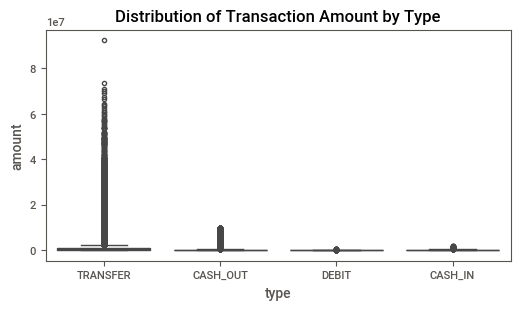

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(x = "type", y = "amount", data = df)
plt.title("Distribution of Transaction Amount by Type")
plt.show()

### Old Balance (Origin)

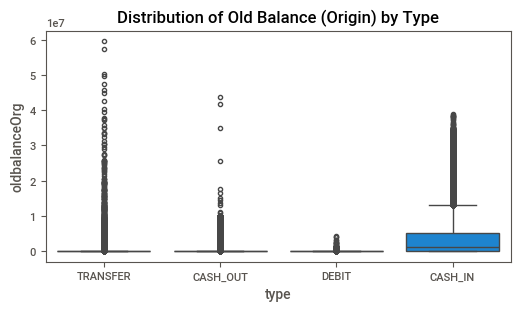

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x = "type", y = "oldbalanceOrg", data = df)
plt.title("Distribution of Old Balance (Origin) by Type")
plt.show()

### New Balance (Origin)

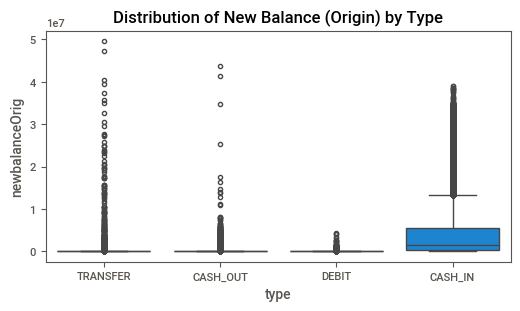

In [18]:
plt.figure(figsize=(6, 3))
sns.boxplot(x = "type", y = "newbalanceOrig", data = df)
plt.title("Distribution of New Balance (Origin) by Type")
plt.show()

### Old Balance (Destination)

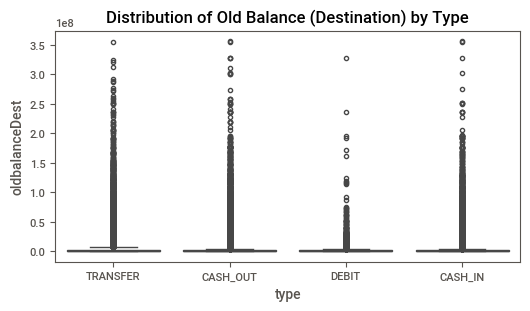

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x = "type", y = 'oldbalanceDest', data = df)
plt.title("Distribution of Old Balance (Destination) by Type")
plt.show()

### New Balance (Destination)

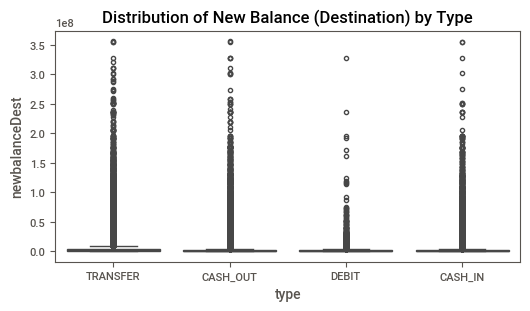

In [20]:
plt.figure(figsize=(6, 3))
sns.boxplot(x = 'type', y = 'newbalanceDest', data = df)
plt.title("Distribution of New Balance (Destination) by Type")
plt.show()

## Correlation Matrix

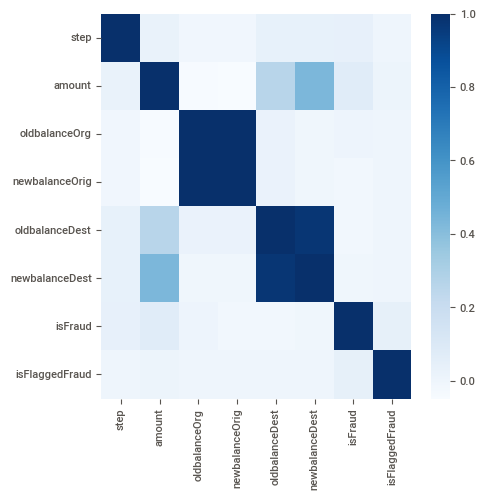

In [21]:
corr = df.drop(["type"], axis = 1).corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, cmap = "Blues")
plt.show()

# Preprocessing

## Categorical Transformation: One-Hot Encode the Transaction Type

In [11]:
df.type.unique()

array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object)

In [10]:
TYPE_MAPPING = {
    'CASH_IN': 'type_cash_in',
    'CASH_OUT': 'type_cash_out',
    'DEBIT': 'type_debit',
    'TRANSFER': 'type_transfer'
}

In [12]:
for category, custom_column in TYPE_MAPPING.items():
    df[custom_column] = (df['type'] == category).astype(int)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'type_cash_in', 'type_cash_out', 'type_debit', 'type_transfer'],
      dtype='object')

In [13]:
df = df.drop(["type"], axis = 1)

## Numerical Features: Ratio of Amount to Each Balance

In [14]:
# Amount : Origin Old Balance
df["amount_old_orig"] = df["amount"] / (df["oldbalanceOrg"] + 0.1)
# Amount : Origin New Balance
df["amount_new_orig"] = df["amount"] / (df["newbalanceOrig"] + 0.1)
# Amount : Destination Old Balance
df["amount_old_dest"] = df["amount"] / (df["oldbalanceDest"] + 0.1)
# Amount : Destination New Balance
df["amount_new_dest"] = df["amount"] / (df["newbalanceDest"] + 0.1)

## Numerical Features: Balance Differences

In [15]:
# Just a test
(df["newbalanceDest"] - df["oldbalanceDest"] != df["amount"]).sum()

3450765

In [16]:
(df["oldbalanceOrg"] - df["newbalanceOrig"] != df["amount"]).sum()

4051273

In [17]:
len(df)

4211125

In [18]:
df["diff_dest"] = df["newbalanceDest"] - df["oldbalanceDest"]
df["diff_orig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

In [19]:
# Drop useless columns
df = df.drop(["oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], axis = 1)
df.columns

Index(['step', 'amount', 'isFraud', 'isFlaggedFraud', 'type_cash_in',
       'type_cash_out', 'type_debit', 'type_transfer', 'amount_old_orig',
       'amount_new_orig', 'amount_old_dest', 'amount_new_dest', 'diff_dest',
       'diff_orig'],
      dtype='object')

## Preprocessed EDA Report

In [22]:
preprocessed_eda_report = sv.analyze((df, "After Preprocessing Data"), "isFraud")
preprocessed_eda_report.show_html("Preprocessed EDA Report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Preprocessed EDA Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
df.head(10)

,step,amount,isFraud,isFlaggedFraud,type_cash_in,type_cash_out,type_debit,type_transfer,amount_old_orig,amount_new_orig,amount_old_dest,amount_new_dest,diff_dest,diff_orig
2,1,181.00,1,0,0,0,0,1,0.999448,1.810000e+03,1810.000000,1.810000e+03,0.00,181.00
3,1,181.00,1,0,0,1,0,0,0.999448,1.810000e+03,0.008545,1.810000e+03,-21182.00,181.00
9,1,5337.77,0,0,0,0,1,0,0.127942,1.467133e-01,0.127399,1.322904e-01,-1549.21,5337.77
10,1,9644.94,0,0,0,0,1,0,2.160073,9.644940e+04,0.889336,6.105079e-02,147137.12,4465.00
15,1,229133.94,0,0,0,1,0,0,14.951546,2.291339e+06,45.077598,4.448033e+00,46430.44,15325.00
19,1,215310.30,0,0,0,0,0,1,305.361367,2.153103e+06,9.601308,2.153103e+06,-22425.00,705.00
21,1,9302.79,0,0,0,0,1,0,0.823321,4.659993e+00,0.311838,5.505652e-01,-12935.30,9302.79
22,1,1065.41,0,0,0,0,1,0,0.586324,1.417353e+00,0.103136,1.065410e+04,-10330.00,1065.41
24,1,311685.89,0,0,0,0,0,1,28.766314,3.116859e+06,49.733671,1.146253e-01,2712905.89,10835.00
41,1,5758.59,0,0,0,0,1,0,0.176622,2.145085e-01,0.027461,3.387940e-01,-192701.78,5758.59


## Data Checkpoint - 1

In [24]:
df.to_csv("cleaned_fraud.csv", index = False)

# Post Checkpoint - 1

## Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CLEANED_DATA_LOCATION = "/kaggle/input/cleaned-fraud-detection-data/cleaned_fraud.csv"

In [4]:
df = pd.read_csv(CLEANED_DATA_LOCATION)
df.head()

,step,amount,isFraud,isFlaggedFraud,type_cash_in,type_cash_out,type_debit,type_transfer,amount_old_orig,amount_new_orig,amount_old_dest,amount_new_dest,diff_dest,diff_orig
0,1,181.00,1,0,0,0,0,1,0.999448,1.810000e+03,1810.000000,1810.000000,0.00,181.00
1,1,181.00,1,0,0,1,0,0,0.999448,1.810000e+03,0.008545,1810.000000,-21182.00,181.00
2,1,5337.77,0,0,0,0,1,0,0.127942,1.467133e-01,0.127399,0.132290,-1549.21,5337.77
3,1,9644.94,0,0,0,0,1,0,2.160073,9.644940e+04,0.889336,0.061051,147137.12,4465.00
4,1,229133.94,0,0,0,1,0,0,14.951546,2.291339e+06,45.077598,4.448033,46430.44,15325.00


## Getting Class Weights Based on Label Distribution

In [5]:
from sklearn.utils.class_weight import compute_class_weight

In [6]:
CLASS_WEIGHT = compute_class_weight("balanced", classes = np.array([0, 1]), y = df.isFraud)
CLASS_WEIGHT = dict(enumerate(CLASS_WEIGHT))
CLASS_WEIGHT

{0: 0.5009770606665093, 1: 256.3694752222087}

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [12]:
y = df.isFraud.values
X = df.drop(["isFraud"], axis = 1).values
print(X.shape, y.shape)

(4211125, 13) (4211125,)


In [13]:
# Custom split
flag_1 = np.where(y == 1, True, False)
n_1 = flag_1.sum()
flag_0 = ~flag_1
n_0 = flag_0.sum()

In [14]:
X_1 = X[flag_1, :]
y_1 = y[flag_1][:]
X_0 = X[flag_0, :]
y_0 = y[flag_0][:]
selected_indices = np.random.randint(0, n_0, size = n_1)

In [15]:
X = np.r_[X_0[selected_indices, :], X_1]
y = np.r_[y_0[selected_indices][:], y_1]

In [16]:
print(X.shape, y.shape)

(16426, 13) (16426,)


In [18]:
# Tradition split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11498, 13) (11498,)
(4928, 13) (4928,)


In [19]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([5749, 5749]))
(array([0, 1]), array([2464, 2464]))


## Modelling

In [20]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [40]:
# Helper function to train and evaluate models
def train_model(model, param_grid, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    # Initiate the grid search
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1, scoring = "f1")
    # Train the grid search
    grid_search.fit(X_train, y_train)
    # Get the best model
    best_model = grid_search.best_estimator_
    
    y_hat = best_model.predict(X_test)
    # F1 Score, Accuracy, Classification Report
    f1 = f1_score(y_test, y_hat)
    accuracy = accuracy_score(y_test, y_hat)
    cr = classification_report(y_test, y_hat)
    print(f"F1 Score: {f1: .2f}")
    print(f"Accuracy: {accuracy: .2f}")
    print("Classification Report:")
    print(cr)
    # Best Parameters
    print(f"Best Parameters: {grid_search.best_params_}")
    # Confusion matrix
    conf = confusion_matrix(y_test, y_hat)
    plt.figure(figsize = (5, 5))
    sns.heatmap(conf, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
    plt.show()
    
    # Return the best model
    return best_model

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr_param_grid = [
    {"solver": ["lbfgs"], "penalty": ["l1", "l2"], "C": np.logspace(-3, 3, 5)},
    {"solver": ["saga"], "penalty": ["elasticnet"], "l1_ratio": [0.25, 0.5, 0.75], "C": np.logspace(-3, 3, 5)}
]

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

F1 Score:  0.99
Accuracy:  0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2464
           1       0.98      1.00      0.99      2464

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


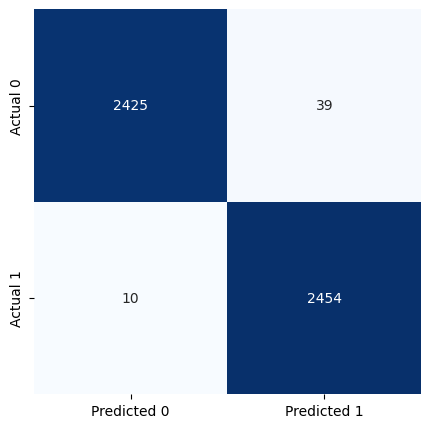

In [43]:
model = train_model(LogisticRegression(random_state = 0), lr_param_grid)

## Feature Importances

In [44]:
# Get the feature importances into a dataframe
feature_importances = model.coef_[0]
importance_df = pd.DataFrame({
    'Feature': df.drop(["isFraud"], axis = 1).columns,
    'Importance': feature_importances
})

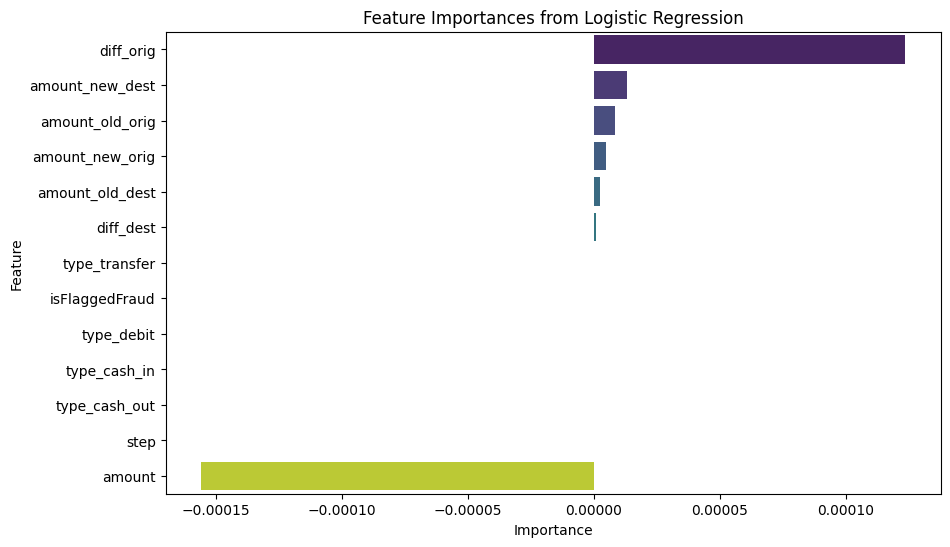

In [45]:
# Sort the features by importance
importance_df = importance_df.sort_values(by = "Importance", ascending = False)
# Plot
plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = importance_df, palette = 'viridis')
plt.title('Feature Importances from Logistic Regression')
plt.show()

## Ignore Below

### Deep Learning

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import Callback

2024-08-11 18:30:15.990510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 18:30:15.990624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 18:30:16.120403: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
# Callback for model checkpointing
class BestModelCheckpoint(Callback):
    def __init__(self):
        super(BestModelCheckpoint, self).__init__()
        self.best = np.Inf
        self.best_weights = None
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs = None):
        current = logs.get("val_loss")
        if current < self.best:
            self.best = current
            self.best_weights = self.model.get_weights()  # Store the best weights
            self.best_epoch = epoch + 1

    def on_train_end(self, logs = None):
        print(f"Best model was seen at the end of the epoch {self.best_epoch}")
        self.model.set_weights(self.best_weights)  # Load the best weights

In [31]:
# Simple neural network wrapper to comply with the 'train_model' function
class NeuralNetwork:
    def __init__(self, configuration = [64, 32], p = 0.5, epochs = 20, batch_size = 32, X_test = X_test, y_test = y_test, class_weight = None, random_state = 0):
        self.configuration = configuration
        self.p = p
        self.epochs = epochs
        self.batch_size = batch_size
        self.X_test = X_test
        self.y_test = y_test
        self.class_weight = class_weight
        
    def fit(self, X_train = X_train, y_train = y_train):
        # Input layer
        layers = [Dense(self.configuration[0], activation = "relu", input_shape = (X_train.shape[1],))]
        # Hidden layers
        for d in self.configuration:
            layers.append(Dense(d, activation = "relu"))
            layers.append(Dropout(self.p))
        # Output layer
        layers.append(Dense(1, activation = "sigmoid"))
        # Initialize model
        self.model = Sequential(layers)
        # Compile
        self.model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
        
        self.history = self.model.fit(X_train, y_train, epochs = self.epochs, batch_size = self.batch_size, validation_data = (self.X_test, self.y_test), class_weight = self.class_weight, callbacks = [BestModelCheckpoint()], verbose = 1)
        
    def predict(self, X_test = X_test):
        return (self.model.predict(X_test) > 0.5).astype(int)
    
#     def get_params(self, deep = True):
#         return {
#             "configuration": self.configuration,
#             "p": self.p,
#             "epochs": self.epochs,
#             "batch_size": self.batch_size,
# #             self.X_test = X_test
# #             self.y_test = y_test
#             "class_weight": self.class_weight
#         }
    
#     def set_params(self, **params):
#         for key, value in params.items():
#             setattr(self, key, value)

In [32]:
nn_param_grid = {
    "configuration": [[32, 32], [64, 32], [64, 64], [64, 64, 32]],
    "p": [0.3, 0.4, 0.5, 0.6],
    "batch_size": [32, 64, 128]
}

In [ ]:
# Find the best deep learning model
best_f1 = 0
best_accuracy = 0
best_f1_accuracy = 0
best_accuracy_f1 = 0
best_f1_model = None
best_accuracy_model = None
best_f1_params = None
best_accuracy_params = None
best_f1_cr = None
best_accuracy_cr = None
best_f1_conf = None
best_accuracy_conf = None
for configuration in nn_param_grid["configuration"]:
    for p in nn_param_grid["p"]:
        for batch_size in nn_param_grid["batch_size"]:
            model = NeuralNetwork(configuration = configuration, p = p, batch_size = batch_size, class_weight = CLASS_WEIGHT)
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)
            # F1 Score, Accuracy, Classification Report
            f1 = f1_score(y_test, y_hat)
            accuracy = accuracy_score(y_test, y_hat)
            cr = classification_report(y_test, y_hat)
            conf = confusion_matrix(y_test, y_hat)
            # Compare to the existing best
            if f1 > best_f1:
                best_f1 = f1
                best_f1_accuracy = accuracy
                best_f1_model = model
                best_f1_params = {"configuration": configuration, "p": p, "batch_size": batch_size}
                best_f1_cr = cr
                best_f1_conf = conf
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_accuracy_f1 = f1
                best_accuracy_model = model
                best_accuracy_params = {"configuration": configuration, "p": p, "batch_size": batch_size}
                best_accuracy_cr = cr
                best_accuracy_conf = conf

In [ ]:
# Model with the best F1 Score
print("Best F1 Score Model")
print("-------------------")
print(f"F1 Score: {best_f1: .2f}")
print(f"Accuracy: {best_f1_accuracy: .2f}")
print("Classification Report:")
print(best_f1_cr)
# Best Parameters
print(f"Best Parameters: {best_f1_params}")
# Confusion matrix
plt.figure(figsize = (5, 5))
sns.heatmap(best_f1_conf, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.show()

In [ ]:
# Model with the best Accuracy Score
print("Best Accuracy Score Model")
print("-------------------")
print(f"F1 Score: {best_accuracy_f1: .2f}")
print(f"Accuracy: {best_accuracy: .2f}")
print("Classification Report:")
print(best_accuracy_cr)
# Best Parameters
print(f"Best Parameters: {best_accuracy_params}")
# Confusion matrix
plt.figure(figsize = (5, 5))
sns.heatmap(best_accuracy_conf, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.show()